## <b>Understanding Feedforward Neural Network</b>

In this lab, you are required to build 3 Feedforward Neural Networks to simulate function
<br> $y = xsin( \frac {x^2} {300})$
<br> in range x: +-100
<br> You need to have a different structure for each model you build.

##Requirements

1 You are required to finish each part below following instructions.
<br>2 You may work on native py files, but your work needs to include same documentation. You may use pytorch or tensorflow keras.
<br>3 You may work in a group of 2.

<br><b>For submission, submit a link to your github repo</b>
<br>Each student in the group must all submit.

#### Part 1: Data Preparation

In the cell below, generate training data for your model.
<br> Generate a decent amount of training data in the interval of x.
<br>
<br>All data need to be separated by the same distance.


In [3]:
# numpy for dataset / matplotlib to plot dataset
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the dataset
def generate_data(x_range, n_samples):
    x=np.linspace(-x_range,x_range,n_samples)
    y=x*np.sin(x**2/300)
    return x,y

# Generate training data
x_range=200
n_samples=2000
x_data,y_data=generate_data(x_range,n_samples)

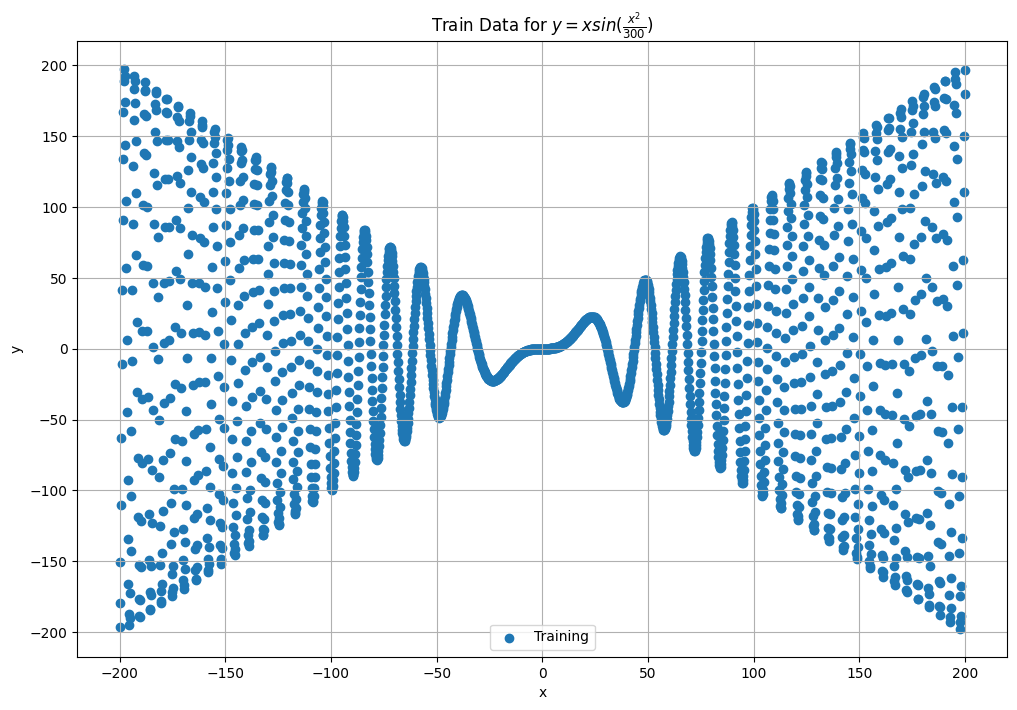

In [4]:
# Plot the generated dataset
plt.figure(figsize=(12,8))
plt.scatter(x_data,y_data,label='Training')
plt.title('Train Data for $y=xsin(\\frac{x^2}{300})$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Part 2 build models

In the cells below, build your models and train it with data from part1.
<br>You need to split your training data to two parts. With 40% used in training, and 60% used in test.

<br>You may do this with sklearn's train_test_split() or keras' validation_split together with train_test_split().

In [5]:
# Import package to split and train dataset
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the dataset and form a training and test set
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.6,random_state=42)

2024-03-08 22:04:11.242648: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Model 1: Basic model with 2 layers
model_1=Sequential([Dense(64,activation='relu',input_shape=(1,)),Dense(1)])
# Compile model 1
model_1.compile(optimizer='adam',loss='mean_squared_error')
# Display summary of model 1
model_1.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Model 2: Deeper model with 4 layers
model_2=Sequential([Dense(128,activation='relu',input_shape=(1,)),Dense(64,activation='relu'),
                    Dense(32,activation='relu'),Dense(1)])
# Compile model 2
model_2.compile(optimizer='adam',loss='mean_squared_error')
# Display summary of model 3
model_2.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model 3: Wider model with 3 layers
model_3=Sequential([Dense(256,activation='relu',input_shape=(1,)),Dense(128,activation='relu'),Dense(1)])
# Compile model 3
model_3.compile(optimizer='adam',loss='mean_squared_error')
# Display summary of model 3




#### Part 3 model evaluation

In the cells below, eval your model with training data, test data ( with model.evaluate( ) ), and plot your predict result on the same plot with the plot of goal function.

#### Part 4 get model output and feedforward by yourself

Recall how a Feedforward Neural Network gets its output. Now choose your model with highest accuracy, and call get_weights( ) to get its weights and bias.
<br> Hint: bias and weights have different dimensions in most cases. Try to guess which index represent bias before you look it up on the internet.

<br> Afterwards, choose 5 data from your training dataset, do all the necessary calculations (with program of course), and get the output of your model. Compare it to the model.predict( ) result.
<br> They should be identical for the first several digitals, if not for all digits.